# Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, roc_curve

import shap

import warnings

warnings.filterwarnings('ignore')

# Load dataset

In [3]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Advanced EDA

In [5]:
print("Dataset shape:", df.shape)

Dataset shape: (7043, 21)


In [6]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
print(df.describe())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


# Check missing values

In [9]:
print("\nMissing values per column:")
print(df.isnull().sum())



Missing values per column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


# Convert TotalCharges to numeric, handle errors

In [10]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Visualize churn distribution

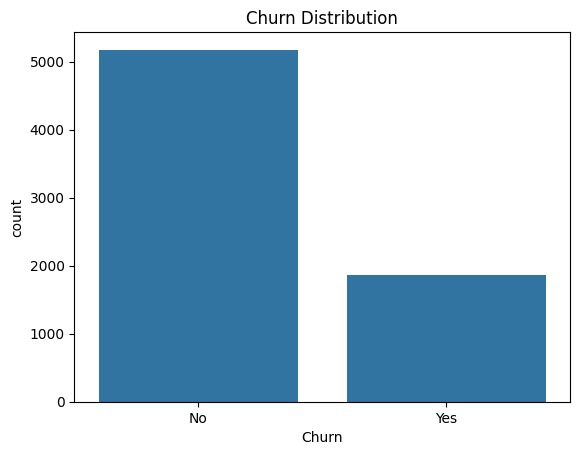

In [11]:
sns.countplot(data=df, x='Churn')
plt.title('Churn Distribution')
plt.show()

# Tenure distribution

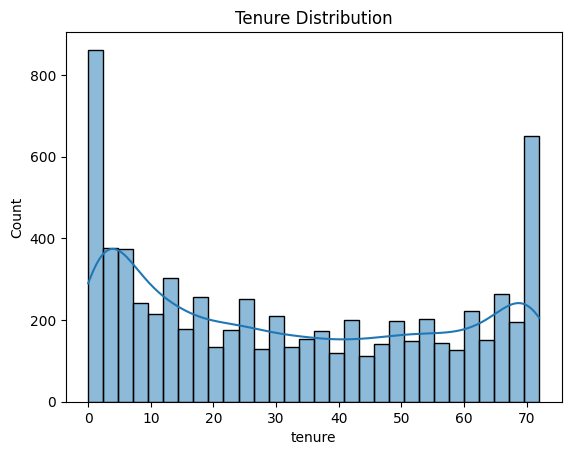

In [12]:
sns.histplot(df['tenure'], bins=30, kde=True)
plt.title('Tenure Distribution')
plt.show()


# Correlation heatmap for numerical features

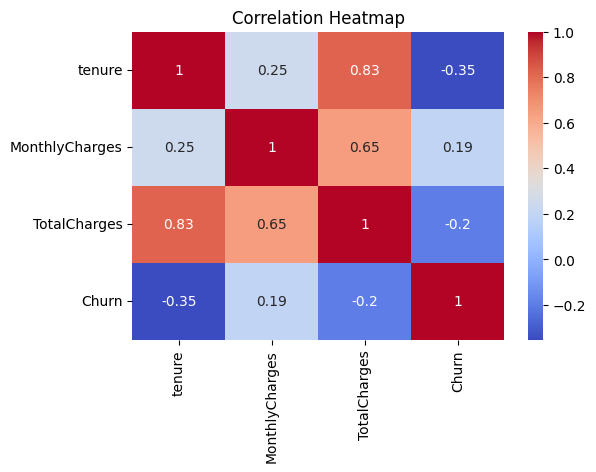

In [19]:
df_corr = df.copy()

df_corr['Churn'] = df_corr['Churn'].map({'Yes': 1, 'No': 0})

num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(6, 4))
sns.heatmap(df_corr[num_features + ['Churn']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


#  2. Feature Engineering

 Create tenure bins


In [20]:
df['tenure_bin'] = pd.cut(df['tenure'], bins=[0, 12, 24, 48, 60, 72], labels=['0-12','12-24','24-48','48-60','60-72'])

In [21]:
# Drop customerID
df.drop('customerID', axis=1, inplace=True)

In [22]:

df['Churn'] = df['Churn'].map({'No':0, 'Yes':1})

In [23]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

print("Categorical columns:", cat_cols)
print("Numerical columns:", num_cols)


Categorical columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Numerical columns: ['tenure', 'MonthlyCharges', 'TotalCharges']


#  3. Preprocessing pipeline 

In [24]:
from sklearn.preprocessing import OneHotEncoder

cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))
])

In [25]:
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])


In [26]:
# Combine preprocessors
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_cols),
    ('cat', cat_transformer, cat_cols)
])


#  4. Modeling with pipeline

In [27]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

In [28]:
#split the dataset
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)



In [29]:
# Hyperparameter grids
param_grids = {
    'Logistic Regression': {
        'model__C': [0.01, 0.1, 1, 10],
        'model__penalty': ['l2'],
        'model__solver': ['lbfgs']
    },
    'Random Forest': {
        'model__n_estimators': [100, 200],
        'model__max_depth': [None, 10, 20],
        'model__min_samples_split': [2, 5],
    },
    'XGBoost': {
        'model__n_estimators': [100, 200],
        'model__max_depth': [3, 6],
        'model__learning_rate': [0.01, 0.1],
        'model__subsample': [0.8, 1]
    }
}

best_models = {}
results = {}

for name, model in models.items():
    print(f"\nRunning GridSearchCV for {name}...")
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])
    
    grid = GridSearchCV(pipe, param_grids[name], cv=5, scoring='roc_auc', n_jobs=-1)
    grid.fit(X_train, y_train)
    
    print(f"Best params for {name}: {grid.best_params_}")
    best_models[name] = grid.best_estimator_


Running GridSearchCV for Logistic Regression...
Best params for Logistic Regression: {'model__C': 10, 'model__penalty': 'l2', 'model__solver': 'lbfgs'}

Running GridSearchCV for Random Forest...
Best params for Random Forest: {'model__max_depth': 10, 'model__min_samples_split': 5, 'model__n_estimators': 200}

Running GridSearchCV for XGBoost...
Best params for XGBoost: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 100, 'model__subsample': 0.8}


In [30]:
# Predict & Evaluate
y_pred = grid.predict(X_test)
y_proba = grid.predict_proba(X_test)[:,1]
    
acc = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
    
results[name] = {
        'accuracy': acc,
        'roc_auc': roc_auc,
        'confusion_matrix': cm,
        'classification_report': cr,
        'model': grid.best_estimator_
    }
    
print(f"\n{name} Test Accuracy: {acc:.4f}")
print(f"{name} Test ROC AUC: {roc_auc:.4f}")
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(cr)


XGBoost Test Accuracy: 0.8070
XGBoost Test ROC AUC: 0.8461
Confusion Matrix:
[[937  98]
 [174 200]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.67      0.53      0.60       374

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



#  5. ROC Curve Plot 

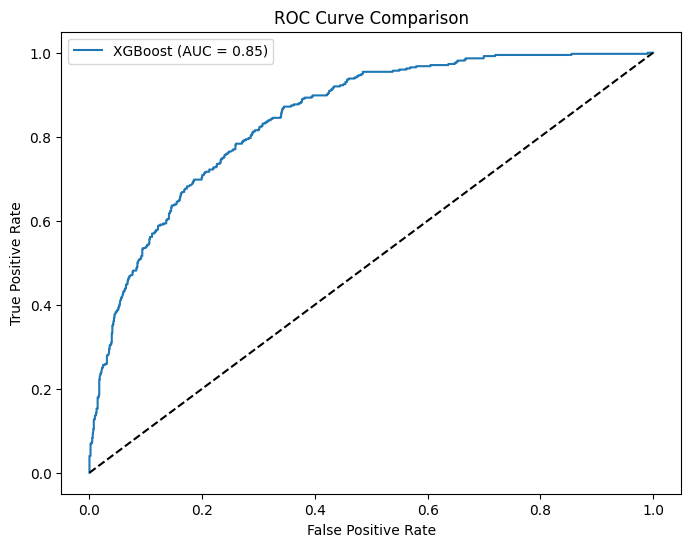

In [31]:
plt.figure(figsize=(8,6))
for name, res in results.items():
    y_proba = res['model'].predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {res['roc_auc']:.2f})")

plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

# 6. SHAP Explainability (for best model)

In [33]:
best_model_name = max(results, key=lambda x: results[x]['roc_auc'])
print(f"\nBest model based on ROC AUC: {best_model_name}")

best_model = results[best_model_name]['model']



Best model based on ROC AUC: XGBoost


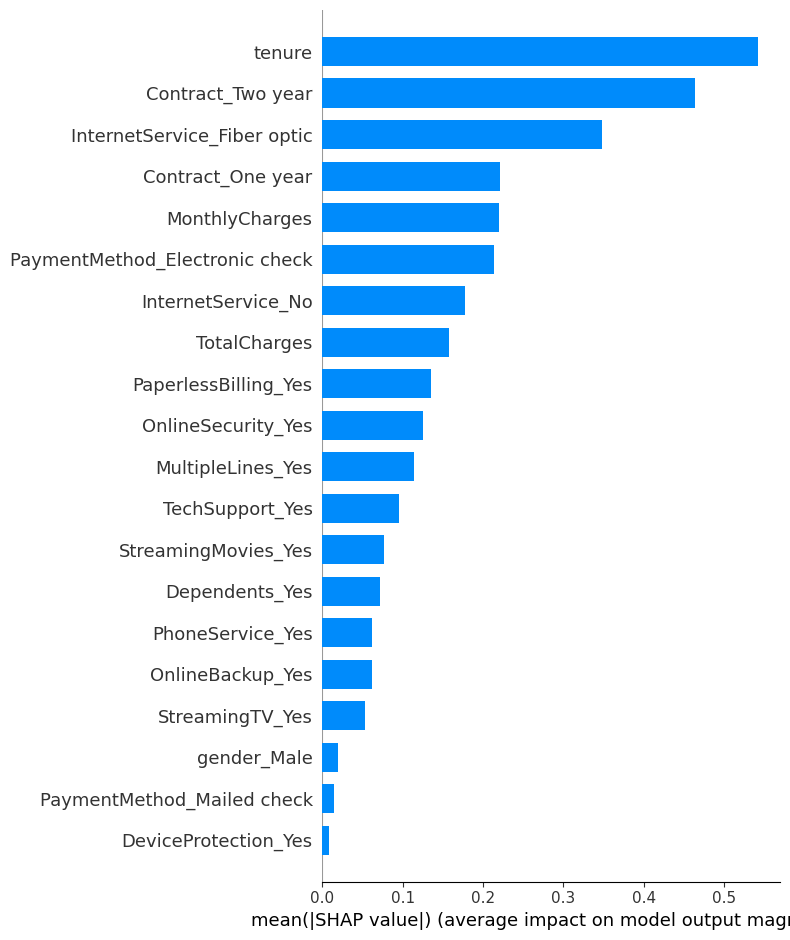

In [34]:
preprocessor_fitted = best_model.named_steps['preprocessor']
model_fitted = best_model.named_steps['model']

# Prepare data for SHAP
X_train_transformed = preprocessor_fitted.transform(X_train)

# SHAP values (only for tree models)
if best_model_name in ['Random Forest', 'XGBoost']:
    explainer = shap.TreeExplainer(model_fitted)
    shap_values = explainer.shap_values(X_train_transformed)
    
    # Feature names after one-hot encoding
    cat_features = preprocessor_fitted.transformers_[1][1]['onehot'].get_feature_names_out(cat_cols)
    feature_names = num_cols + list(cat_features)
    
    shap.summary_plot(shap_values, features=X_train_transformed, feature_names=feature_names, plot_type='bar')
else:
    print("SHAP explainability supported only for tree-based models.")
